In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import growth_curve_analysis as od

In [5]:
blank_file = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/gen_blank_file.xlsx'

In [57]:
date = '20160721'

In [58]:
expt = od.Experiment('/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl data.txt', 
    plate_layout = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl layout.xlsx',
    blank_file = blank_file,
    out_dir='/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/EffGR 2-6hrs analysis/'+date+'/')

initialized experiment


determining window size
window size is 9
No data between start and saturation time for well D2
No data between start and saturation time for well D1
analyzed samples
created output data table


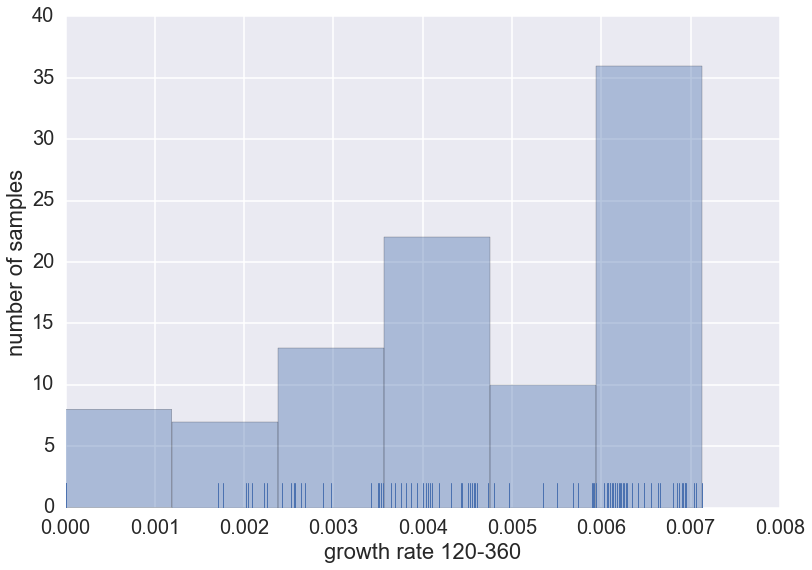

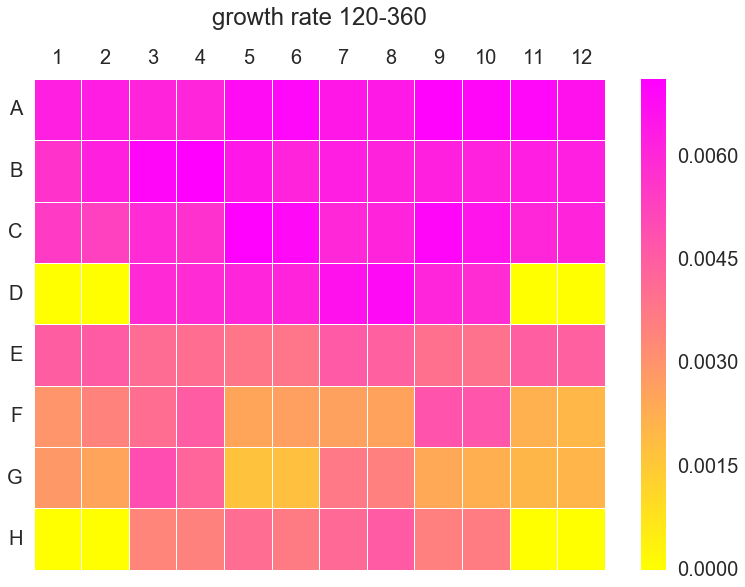

In [60]:
# for effective growth rate calc only
expt.analyze_sample_data(method='effective_growth_rate', sample_plots=False, start=120, end=360, saturation=True)
expt.output_data()
od.make_plots(expt, metric1='growth rate 120-360', unit1='', metric2='growth rate 120-360', save=True)

In [28]:
expt.data[:3]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.207,0.225,0.226,0.193,0.185,0.204,0.199,0.218,0.161,0.211,...,0.235,0.218,0.251,0.217,0.249,0.219,0.158,0.191,0.187,0.192
1,0.217,0.240,0.235,0.203,0.192,0.213,0.208,0.228,0.167,0.220,...,0.237,0.218,0.248,0.216,0.246,0.217,0.158,0.186,0.183,0.189
2,0.228,0.250,0.245,0.211,0.200,0.219,0.217,0.237,0.169,0.227,...,0.236,0.219,0.244,0.213,0.239,0.214,0.157,0.184,0.181,0.188


In [ ]:
expt = od.Experiment('/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/ypd nacl data redo.txt', 
    #plate_layout = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl layout.xlsx',
    blank_file = blank_file,
    out_dir='/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Newest analysis/')

In [ ]:
# to test David's data for more than 24 hours
expt = od.analyze_experiment('data_36hrs.xlsx')
    #plate_layout = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl layout.xlsx',
    #blank_file = blank_file,
    #out_dir='/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Newest analysis/')

In [ ]:
expt.output_data()

In [ ]:
expt.results

In [ ]:
# for calc of max growth rate, with lag and saturation times
expt = od.analyze_experiment(
    '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl data.txt', 
    plate_layout = '/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/Original Data Files/'+date+'/'+date+' ypd nacl layout.xlsx',
    droplow=True, sample_plots=True, blank_file = blank_file,
    out_dir='/Users/nwespe/Dropbox/Research - Data/PG GC Experiments/GC Analysis/'+date+'/')

In [ ]:
od.make_plots(expt, metric1='growth rate', unit1='', save=True)
#expt.plot_histogram(metric='growth rate', unit='')
#expt.plot_heatmap(save='True', vmin=0.0045, vmax=0.007)

In [ ]:
well = 'E1'

In [ ]:
self = expt.samples[well]
self.plot_growth_parameters()

In [ ]:
sample.eff_end

In [ ]:
from scipy import interpolate, signal, stats

In [ ]:
# used to override use of saturation point as end point for effective gr calc
self.eff_end = 36
times = self.elapsed_time[self.eff_start:self.eff_end]
sub_data = self.log_data[self.eff_start:self.eff_end]
results = stats.mstats.linregress(times, sub_data)
self.effective_gr = results[0]
self.effective_int = results[1]
self.effective_r2 = results[2]**2
if self.effective_r2 < 0.85 or self.effective_gr <= 0 or np.isnan(self.effective_gr):
# lowered to accommodate samples that reach saturation
    self.effective_gr = 0
    self.effective_int = np.mean(sub_data)
    self.effective_dt = np.nan
else:
    self.effective_dt = np.log(2)/self.effective_gr
self.effective_fit = [((self.effective_gr * x) + self.effective_int) for x in self.elapsed_time]

In [ ]:
self.sat_time

In [ ]:
self.plot_growth_parameters(show=True, save=False)

In [ ]:
expt.analyze_sample_data(method='effective_growth_rate', sample_plots=True, start=0, end=360, saturation=True)
expt.output_data()
od.make_plots(expt, metric1='growth rate 0-360', unit1='', metric2='growth rate 0-360', save=True)

In [ ]:
from scipy import stats, interpolate

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
colors = sns.color_palette("Spectral", n_colors=len(rates))

In [ ]:
maximum_rate

In [ ]:
plt.scatter(rates, r_vals, c=colors)
plt.axhline(0.9)
#plt.axvline(.00156)

In [ ]:
plt.plot(x, ctf4_ita.blank)
i = 0
for well in blank_list:
    plt.plot(x, ctf4_ita.data.loc[:,well], '.', color=colors[i])
    i += 1

In [ ]:
A1.plot_rates_distribution()

In [ ]:
B1 = ctf4_ita.samples['B1']

In [ ]:
B1.plot_growth_parameters(save=True)

In [ ]:
B1.growth_rate

In [ ]:
num_windows = len(A12.log_rates)-20
plt.figure()
for i in reversed(range(0, num_windows)):
    color = colors[i]
    sub_data = A12.log_rates[i:i+20]
    sns.distplot(sub_data, hist=False, kde=True, rug=True, color=color, kde_kws={'bw':0.0001})
plt.show()
    #A1.plot_rates_distribution(rates=sub_data)

In [ ]:
import seaborn as sns

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [ ]:
step = 0.0005
x_grid = arange(min(A1.slopes)-step, max(A1.slopes)+step, step)
x_grid

In [ ]:
sns.set_palette('Spectral', n_colors=len(A1.slopes))
colors= sns.color_palette()
sns.palplot(colors)

In [ ]:
num_windows = len(A1.slopes)-9
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in reversed(range(0, num_windows)):    
    color = colors[i]
    sub_data = A1.slopes[i:i+9]
    kde = stats.gaussian_kde(sub_data)
    x_points = kde.evaluate(x_grid)
    z = [i]*len(x_points)
    ax.plot(x_grid, z, x_points, color=color)
plt.show()

In [ ]:
window_times

In [ ]:
marco_expt = od.analyze_experiment(
    '/Users/nmcollin/Desktop/marco_wtemp_subset.xlsx',
    blank=0, method='sliding_window', out_dir='/Users/nmcollin/Desktop/')

In [ ]:
A12 = marco_expt.samples['A12']

In [ ]:
A12.plot_growth_parameters()

In [ ]:
sns.distplot(A12.log_rates, hist=False, kde=True, rug=True, kde_kws={'bw':0.0005})
#sns.distplot(A12slopes, hist=False, kde=True, rug=True, color='blue', kde_kws={'bw':0.0005})

In [ ]:
sns.set_palette('Spectral', n_colors=len(A12slopes))
colors= sns.color_palette()
sns.palplot(colors)

num_windows = len(A12slopes)-9
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in reversed(range(0, num_windows)):    
    color = colors[i]
    sub_data = A12slopes[i:i+9]
    kde = stats.gaussian_kde(sub_data)
    x_points = kde.evaluate(x_grid)
    z = [i]*len(x_points)
    ax.plot(x_grid, z, x_points, color=color)
plt.show()

In [ ]:
A12.plot_rates_distribution(rates=A12slopes)

In [ ]:
expt0311_means = od.compute_means(expt0311, keys=['name', 'media'])
expt0311_means

In [ ]:
import pandas as pd

In [ ]:
expt0218_results = expt0218.results

In [ ]:
pre0218_gr = pre0218.results.loc[:,['strain', 'growth rate', 'media']]
pre0218_gr['media'] = 'pre-incubation'
growthrates0218 = pd.concat([pre0218_gr, expt0218_results], join='inner')
growthrates0218

In [ ]:
expt0218_means.columns = [' '.join(col).strip() for col in expt0218_means.columns.values]
expt0218_means

In [ ]:
import seaborn as sns

In [ ]:
7

In [ ]:
expts003 = [expt1228.results, expt0114.results, expt0120.results]
expts006 = [expt0121.results, expt0218.results]

In [ ]:
genotypes = pd.read_excel('/Users/nmcollin/Desktop/strain-genotype.xlsx')

In [ ]:
data003 = pd.concat(expts003)
data003[-10:]

In [ ]:
data003.rename(columns={'strain': 'name'})

In [ ]:
def get_clone(row):
    strain = row['strain']
    try: clone = strain[3]
    except: clone = np.nan
    return clone

In [ ]:
def strip_clone(row):
    strain = row['strain']
    try: 
        clone = strain[3]
        strain = strain[:3]
    except: clone = np.nan
    return strain

In [ ]:
data003['strain'] = data003.apply(lambda row: strip_clone(row), axis=1 )

In [ ]:
data003['clone'] = data003.apply(lambda row: get_clone(row), axis=1 )

In [ ]:
data006['clone'] = data006.apply(lambda row: get_clone(row), axis=1 )

In [ ]:
data006['strain'] = data006.apply(lambda row: strip_clone(row), axis=1 )

In [ ]:
data003_genes.iloc[-25:-5, 12:]

In [ ]:
sns.barplot(x='strain', y='growth rate', hue='media', data=data003_IMP2,
               hue_order=['YPD', '0.5 M NaCl'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('IMP2 in 003 Growth Rates')
#plt.savefig('/Users/nmcollin/Desktop/20160218/all0218_barplot.png')

In [ ]:
data003.loc[data003['expt_date'] == '2016-01-20']

In [ ]:
df = data003.copy()

In [ ]:
df['strain'] = df['strain'].astype(str)

In [ ]:
result = pd.merge(df, genotypes, how='left', on='strain', sort=False, suffixes=['_expt', '_ref'])

In [ ]:
result.loc[30:60,['strain', 'media', 'replicate', 'expt_date', 'gene', 'allele']]

In [ ]:
data003_IMP2 = result.loc[result['gene'] == 'IMP2']
data003_IMP2_wt = pd.concat([data003_IMP2, result.loc[result['strain'] == '003']])

In [ ]:
data003_IMP2_wt

In [ ]:
del data003_IMP2_wt['index']

In [ ]:
sns.barplot(x='strain', y='time of max growth rate', hue='media', data=data003_IMP2_wt,
               hue_order=['YPD', '0.5 M NaCl'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('IMP2 in 003 Growth Rates')
#plt.savefig('/Users/nmcollin/Desktop/20160218/all0218_barplot.png')

In [ ]:
data003_HAL5 = result.loc[result['gene'] == 'HAL5']
data003_HAL5_wt = pd.concat([data003_HAL5, result.loc[result['strain'] == '003']])

In [ ]:
data003_HAL5_wt = data003_HAL5_wt.reset_index()

In [ ]:
del data003_HAL5_wt['index']

In [ ]:
data003_HAL5_wt

In [ ]:
sns.barplot(x='strain', y='growth rate', hue='media', data=data003_HAL5_wt,
               hue_order=['YPD', '0.5 M NaCl'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('HAL5 in 003 Growth Rates')
#plt.savefig('/Users/nmcollin/Desktop/20160218/all0218_barplot.png')

In [ ]:
data003_HXT1 = result.loc[result['gene'] == 'HXT1']
data003_HXT1_wt = pd.concat([data003_HXT1, result.loc[result['strain'] == '003']])

In [ ]:
def name(row):
    strain = row['strain']
    clone = row['clone_expt']
    try: name = strain+clone
    except: name = strain
    return name

In [ ]:
data003_HXT1_wt

In [ ]:
data003_HXT1_wt['name'] = data003_HXT1_wt.apply(lambda row: name(row), axis=1)

In [ ]:
sns.barplot(x='name', y='growth rate', hue='media', data=data003_HXT1_wt,
               hue_order=['YPD', '0.5 M NaCl'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('HXT1 in 003 Growth Rates')